# 0. Nạp các thư viện Python cần thiết vào Notebook trước khi đi phân tích

In [1]:
# Import các thư viện cần thiết trước khi đi khám phá dữ liệu
import numpy as np # Thư viện tính toán cơ bản của Python
import pandas as pd # Giúp thao tác với dữ liệu dạng bảng

import matplotlib.pyplot as plt # Thư viện cơ bản để trực quan hóa
import seaborn as sns # Cũng là một thư viện trực quan hóa được xây dự dựa trên matplotlib

import warnings # Loại bỏ cách báo trong khi chạy
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split # Giúp chia tập dữ liệu trước khi cho mô hình học
from sklearn.linear_model import LinearRegression # Mô hình hồi quy tuyến tính của scikit-learn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Các chỉ số cần thiết để đánh giá mô hình
from sklearn.preprocessing import StandardScaler # Dùng để scale dữ liệu

plt.style.use('ggplot') # Chỉnh giao diện khi trực quan các biểu đồ
%matplotlib inline

***
## Bài toán đặt ra:

<p style="font-size:18px; text-align:justify"> Giả sử bạn là nhà khoa học dữ liệu (Data Scientist) của một Công ty bán hàng ABC mang tầm cỡ quốc tế. Mỗi ngày, công ty của bạn cung cấp ra thị trường trong và ngoài nước hàng nghìn mặt hàng khác nhau và thu về lợi nhuận hàng nghìn đô. Để bán được lượng hàng lớn như vậy, công ty của bạn đã phải trả chi phí cho quảng cáo ở trên 3 kênh chính là:</p>
    <p style="font-size:25px; text-align:center">
        <img src="https://cdn2.iconfinder.com/data/icons/social-media-2285/512/1_Youtube_colored_svg-512.png" width=20 alt="YouTube Logo"> YouTube<br>
        <img src="https://cdn2.iconfinder.com/data/icons/social-media-2285/512/1_Facebook_colored_svg_copy-512.png" width=20 alt="Facebook Logo"> Facebook<br>
        <img src="https://cdn1.iconfinder.com/data/icons/mail-and-postman-1/500/SingleCartoonMailAndPostmanAlice_14-512.png" width=20 alt="Newspaper icon"> Báo (newspaper)<br>
    </p>
<p style="font-size:18px; text-align:justify">Vào một ngày đẹp trời, Sếp của bạn hỏi bạn: <i>"Liệu chúng ta nên đầu tư vào quảng cáo ở mảng nào thì sẽ hiệu quả hơn so với hiện tại?".</i> Bạn sẽ trả lời như thế nào với Sếp của bạn?</p>

<p style="font-size:18px"> Với kiến thức và kinh nghiệm của một nhà khoa học dữ liệu, thế là bạn bắt tay vào thu thập dữ liệu và kết quả là bộ data</p>

# 1. Khám phá dữ liệu (EDA)

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


## Mô tả sơ bộ các cột trong dataframe trên

| Tên cột | Mô tả |
|---------|-------|
|**YouTube**| Chi phí dành cho quảng cáo trên YouTube|
|**Facebook**| Chi phí dành cho quảng cáo trên Facebook|
|**Newspaper**| Chi phí dành cho quảng cáo trên báo|
|**Sales**| Lợi nhuận thu được từ các mặt hàng tương ứng|

In [3]:
# Hàm shape cho ta cái nhìn ban đầu về hình dạng của dữ liệu
nRows, nCols = df.shape
print(f"Trong bộ dữ liệu trên ta có {nRows} hàng và {nCols} cột")

Trong bộ dữ liệu trên ta có 171 hàng và 4 cột


In [4]:
# Hàm info cho ta nhiều thông tin hữu ích
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


*Ta thấy trong bộ dữ liệu trên:*
- Có tất cả 4 cột với 171 dòng và không có cột nào bị thiếu giá trị (NaN)
- Cả 4 cột đều là loại số thực (float64)

## Các tham số thống kê cơ bản của dữ liệu được mô tả bởi hàm describe

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
youtube,171.0,178.021053,102.449597,0.84,91.08,179.76,262.98,355.68
facebook,171.0,27.671579,17.913532,0.00,11.70,26.76,43.68,59.52
newspaper,171.0,35.240000,24.902918,0.36,13.74,31.08,50.88,121.08
sales,171.0,16.922807,6.314608,1.92,12.54,15.48,20.82,32.40


***Một số nhận xét về các tham số trên:***

***Trong cột YouTube ta có:***
- Chi phí thấp nhất là: $840$ USD
- Chi phí cao nhất là: $356$K USD
- Chi phí trung bình là: $178$K USD
- Độ lệch chuẩn là: $102$K USD

***Trong cột Facebook ta có:***
- Chi phí thấp nhất là: $0$ USD
- Chi phí cao nhất là: $60$K USD
- Chi phí trung bình là: $28$K USD
- Độ lệch chuẩn là: $18$K USD

***Trong cột Newspaper ta có:***
- Chi phí thấp nhất là: $360$ USD
- Chi phí cao nhất là: $121$K USD
- Chi phí trung bình là: $35$K USD
- Độ lệch chuẩn là: $25$K USD

***Trong cột Sales ta có:***
- Lợi nhuận thấp nhất: $2$K USD
- Lợi nhuận cao nhất là: $32$K USD
- Lợi nhuận trung bình là: $17$K USD
- Độ lệch chuẩn là: $6$K USD

## Đối với các tham số còn lại, ta tiến hành vẽ đồ thị hộp râu (boxplot) để phát hiện các điểm bất thường

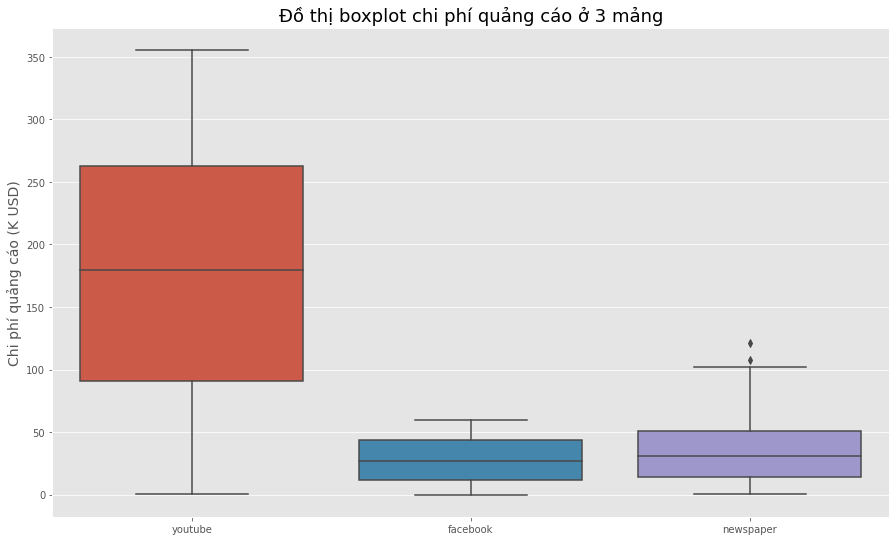

In [6]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df.loc[:, ['youtube', 'facebook', 'newspaper']])
plt.title("Đồ thị boxplot chi phí quảng cáo ở 3 mảng", fontsize=18)
plt.ylabel('Chi phí quảng cáo (K USD)', fontsize=14)
plt.show()

***Dễ dàng nhận thấy rằng:*** Cột **Newspaper** có bị outlier. Vì các điểm dữ liệu này có thể làm nhiễu cho quá trình phân tích nên ta tiến hành lọc bỏ

In [7]:
q1 = np.quantile(df['newspaper'], .25)
q3 = np.quantile(df['newspaper'], .75)
iqr =  q3 - q1
ub = q3 + 1.5 * iqr # Giá trị râu trên của boxplot

In [8]:
# Thực hiện lọc và gán trực tiếp trở lại dataframe cũ
df = df.loc[df['newspaper'] <= ub]
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


## Tiếp theo, ta sẽ xem xét mức độ tương quan giữa các biến với nhau

In [9]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.092200,0.110262,0.776382
facebook,0.092200,1.000000,0.270263,0.614581
newspaper,0.110262,0.270263,1.000000,0.253835
sales,0.776382,0.614581,0.253835,1.000000


### Vì chúng ta muốn xem xét liệu nên đầu tư quảng cáo vào đâu sẽ làm tăng doanh thu (sales) nên ta cần xem xét mức độ tương quan của các cột khác với cột sales

In [10]:
df.corr().sort_values(by='sales', ascending=False)[1:][['sales']]

,sales
youtube,0.776382
facebook,0.614581
newspaper,0.253835


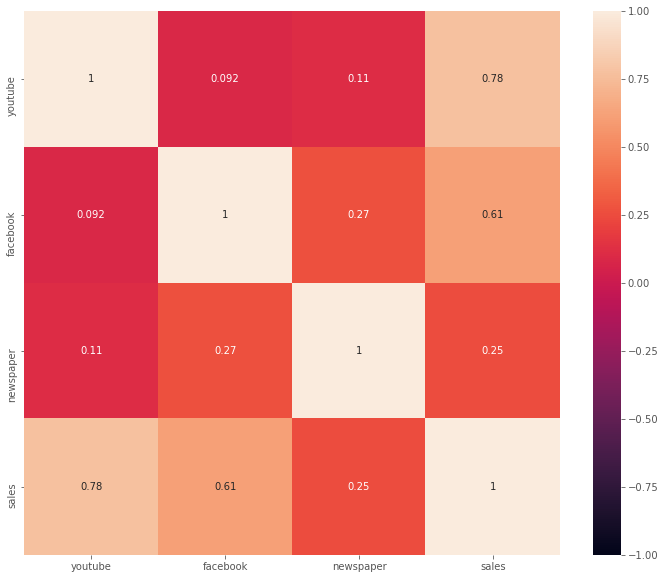

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [12]:
def make_scatterplot(df, x, y, title, **kwargs):
    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=df, x=x, y=y, **kwargs)
    plt.title(title, fontsize=18)
    plt.xlabel(x + ' advertising costs', fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.show()

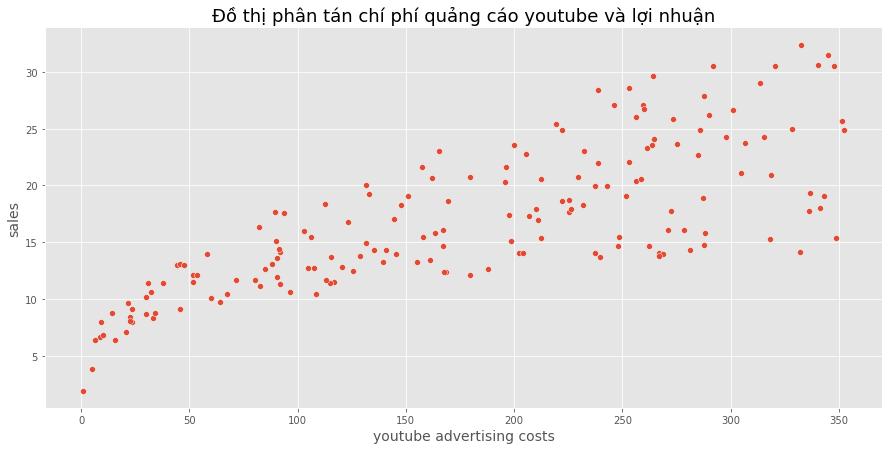

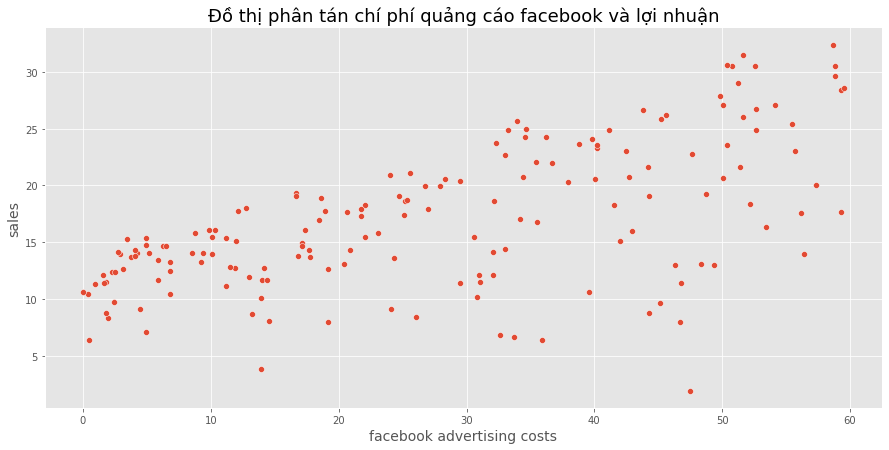

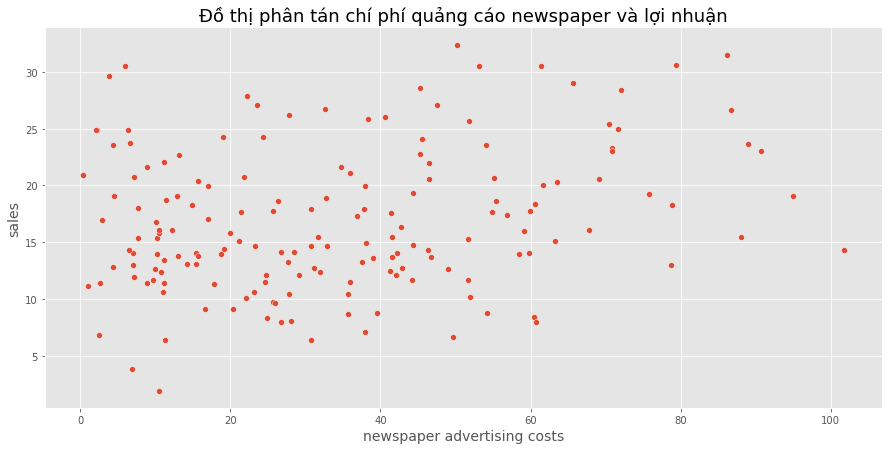

In [13]:
for col in df.columns[:-1]:
    make_scatterplot(df, col, 'sales', title='Đồ thị phân tán chí phí quảng cáo %s và lợi nhuận' % (col))

## Nhận xét về sự tương quan giữa các biến
- Cột **YouTube** và cột **Facebook** có tương quan khá tốt với cột **Sales**, ta hình dung dữ liệu theo từng cặp có tương quan đồng biến và gần như nằm trên một đường thẳng
- Cột **Newspaper** có tương quan khá thấp với cột **Sales**, từ scatter trên ta cũng thấy rằng chúng phân bố rải đều và hầu như rời rạc với nhau<br>
$=>$ Chi phí quảng cáo dành cho **YouTube** và **Facebook** có tầm ảnh hưởng quan trọng đối với lợi nhuận của công ty (**Sales**), còn chi phí quảng cáo trên **Newsaper** gần như không đem lại lợi nhuận. Do đó, ta nên đầu tư quảng cáo vào 2 mảng chính là **YouTube** và **Facebook**.

## Vậy câu hỏi đặt ra là: Chúng ta nên đầu tư chi phí quảng cáo vào YouTube hay Facebook?

<p style="font-size:20px; text-align:justify"><b>Để trả lời cho câu hỏi này, ý tưởng là ta sẽ xây dựng các mô hình học máy dựa trên bộ dữ liệu đã có nhằm đánh giá mức độ hiệu quả của việc đầu tư. Với bài toán này chúng ta sử dụng hai mô hình hồi quy tuyến tính đơn biến
    </b>
</p>

<p style="font-size:20px; text-align:justify">Giải thích lý do tại sao lại sử dụng mô hình hồi quy tuyến tính: bài toán này thuộc lớp bài toán dự đoán giá trị (predict) giữa các biến có mối tương quan với nhau, một/nhiều biến sẽ là biến độc lập và biến còn lại là biến phản hồi. Dạng bài toán này là tìm ra một hàm có dạng $h(x) = ax + b$ sao cho các giá trị mà hàm này dự đoán gần đúng nhất với giá trị thực tế.</p>

# 2. Chuẩn bị dữ liệu

## Xây dựng mô hình hồi quy tuyến tính giữa **YouTube** và **Sales** ta cần chuẩn bị các dữ liệu

In [14]:
X_yt = df[['youtube']]
y_yt = df.sales

X_yt_train, X_yt_test, y_yt_train, y_yt_test = train_test_split(X_yt, y_yt, test_size=.2, random_state=52)

## Xây dựng mô hình hồi quy tuyến tính giữa **Facebook** và **Sales** ta cần chuẩn bị các dữ liệu

In [15]:
X_fb = df[['facebook']]
y_fb = df.sales

X_fb_train, X_fb_test, y_fb_train, y_fb_test = train_test_split(X_fb, y_fb, test_size=.2, random_state=52)

# 3. Xây dựng mô hình

## Ý tưởng xây dựng mô hình

![Learning Algorithm](./assets/la.png)

## Xây dựng mô hình hồi quy tuyến tính giữa **YouTube** và **Sales**

In [16]:
model_yt = LinearRegression().fit(X_yt_train, y_yt_train)
yt_pred = model_yt.predict(X_yt_test)

### Trực quan mô hình

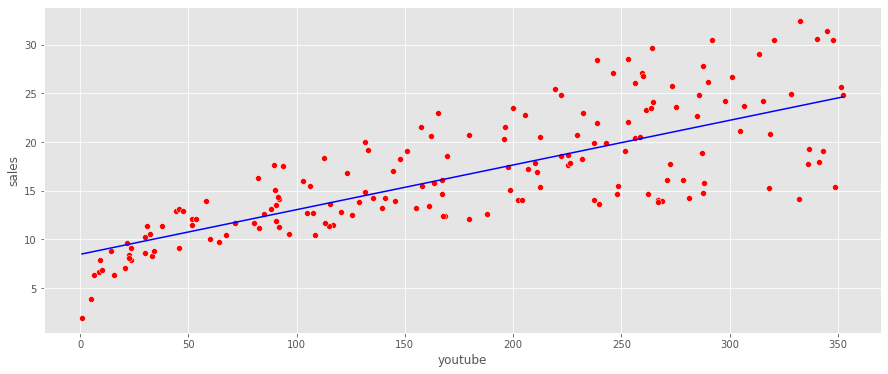

In [17]:
xx = np.linspace(df['youtube'].min(), df['youtube'].max(), 2)
yy = model_yt.intercept_ + model_yt.coef_ * xx

plt.figure(figsize=(15, 6))
sns.scatterplot(df['youtube'], df['sales'], color='r')
sns.lineplot(xx, yy, color='b')
plt.show()

## Xây dựng mô hình hồi quy tuyến tính giữa **Facebook** và **Sales**

In [18]:
model_fb = LinearRegression().fit(X_fb_train, y_fb_train)
fb_pred = model_fb.predict(X_fb_test)

### Trực quan mô hình

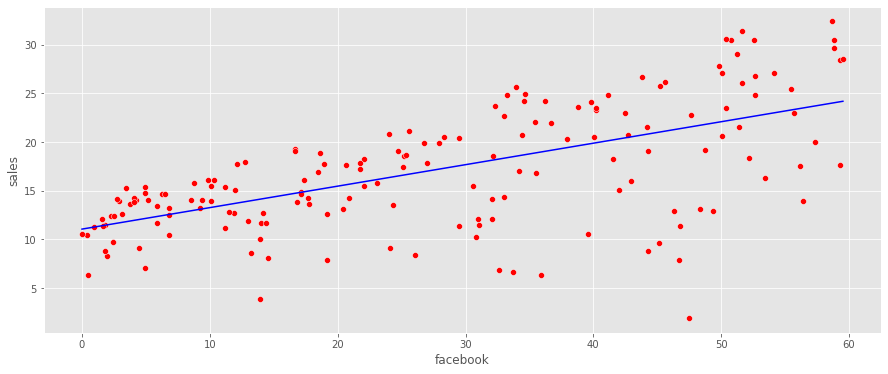

In [19]:
xx = np.linspace(df['facebook'].min(), df['facebook'].max(), 2)
yy = model_fb.intercept_ + model_fb.coef_ * xx

plt.figure(figsize=(15, 6))
sns.scatterplot(df['facebook'], df['sales'], color='r')
sns.lineplot(xx, yy, color='b')
plt.show()

# 4. Đánh giá mô hình và đưa ra kết luận

## Để đánh giá 2 mô hình hồi quy tuyến tính xem mô hình nào tốt hơn, ta sử dụng 2 tham số là $R^2$ và $MSE$/$RMSE$

<p style="font-size:18px">
    R Square ($R^2$) là hệ số xác định (coefficient of determination) mức độ biến thiên của <b><i>biến phụ thuộc</i></b> (dependent variable)
    được giải thích bao nhiêu phần trăm bởi mô hình.<br>
    Adjusted R Square là hệ số xác định hiệu chỉnh có ý nghĩa tương tự hệ số xác định.
</p>

## Công thức của hệ số xác định $R^2$:

![Rsquared formula](./assets/rsquared.png)

<p style="font-size:18px">
    MSE là Mean Squared Error, sai số toàn phương trung bình, là sự chênh lệch bình phương trung bình giữa các giá trị thực và giá trị ước tính<br>
    RMSE là phép lấy căn bậc 2 của MSE, vì trong khi tính toán phép MSE ta có sử dụng bình phương, nó sẽ có cùng giá trị với dữ liệu
</p>

## Công thức của $MSE$:

![mese formula](./assets/mse.svg)

## Công thức của $RMSE$:

![rmse formula](./assets/rmse.png)

## Thì để đánh giá 2 mô hình dựa trên các tham số này thì ta có, mô hình nào có điểm cao hơn với lỗi ít hơn sẽ là mô hình tốt hơn

In [20]:
# Điểm R2 của mô hình thứ nhất (YouTube và Sales)
print("Điểm R^2 của mô hình hồi quy thứ nhất là:", r2_score(y_yt_test, yt_pred))
print("RMSE của mô hình hồi quy thứ nhất là:", np.sqrt(mean_squared_error(y_yt_test, yt_pred)))

Điểm R^2 của mô hình hồi quy thứ nhất là: 0.6042635335109166
RMSE của mô hình hồi quy thứ nhất là: 4.401180738706741


In [21]:
# Điểm R2 của mô hình thứ hai (Facebook và Sales)
print("Điểm R^2 của mô hình hồi quy thứ hai là:", r2_score(y_fb_test, fb_pred))
print("RMSE của mô hình hồi quy thứ hai là:", np.sqrt(mean_squared_error(y_fb_test, fb_pred)))

Điểm R^2 của mô hình hồi quy thứ hai là: 0.30722362069667575
RMSE của mô hình hồi quy thứ hai là: 5.823213372095382


***Nhận xét:*** Ta thấy mô hình thứ nhất có điểm cao hơn với lỗi thấp hơn nên sẽ là mô hình tốt hơn.

## Kết luận: Do đó, ta nên đầu tư chi phí quảng cáo vào YouTube sẽ đem lại lợi nhuận cho công ty

# 5. Dự đoán lợi nhuận

## Vấn đề: Dự đoán lợi nhuận thu được nếu đầu tư $200$K USD vào việc quảng cáo trên YouTube

### Ta sẽ sử dụng mô hình học máy đã được xây dựng ở trên để đưa ra dự đoán

### Bản chất của mô hình học máy này là một hàm $f(x) = ax + b$ nên ta dễ dàng có thể đưa ra được dữ đoán bằng cách thế số tiền cần đầu tư và ta sẽ có giá trị dự đoán lợi nhuận. Thư viện scikit-learn cung cấp hàm dự đoán cho ta, do đó việc dự đoán trở nên dễ dàng

In [22]:
yt_costs = 200
sales_pred = model_yt.predict([[yt_costs]])
print(f'Lợi nhuận thu lại được nếu ta đầu tư {yt_costs}K USD vào quảng cáo của YouTube là {sales_pred[0]}K USD')

Lợi nhuận thu lại được nếu ta đầu tư 200K USD vào quảng cáo của YouTube là 17.64844886332789K USD


## Giá trị lợi nhuận chỉ mang tính tương đối, trong thực tế có thể thay đổi lên xuống tuy nhiên thay đổi không nhiều